## Model Comparison for Quora Duplicate Questions

This notebook compares the performance of different models and feature extraction approaches for Quora Duplicate Questions detection.

In [28]:
import os
import joblib
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
DATA_PATH = '/content/drive/MyDrive/quora_duplicate_questions/data/processed'
experiment_results = joblib.load(os.path.join(DATA_PATH, 'experiment_results.joblib'))

results_df = pd.DataFrame(experiment_results)

In [29]:
experiment_results = joblib.load('../data/processed/experiment_results.joblib')

results_df = pd.DataFrame(experiment_results)
results_df

,model,log_loss_train,log_loss_val
0,Logistic Regression,0.452011,0.464310
1,Random Forest,0.463244,0.482737
2,XGBClassifier,0.538028,0.539679
3,LGBMClassifier,0.475792,0.488811
4,BERT Fine-Tuning,0.228660,0.273120
5,SentenceTransformer with Cosine Similarity,0.443070,0.440290
6,GloVe Embeddings with Logistic Regression,0.566150,0.565360
7,Logistic Regressin with TF-IDF on matching words,0.517740,0.538560


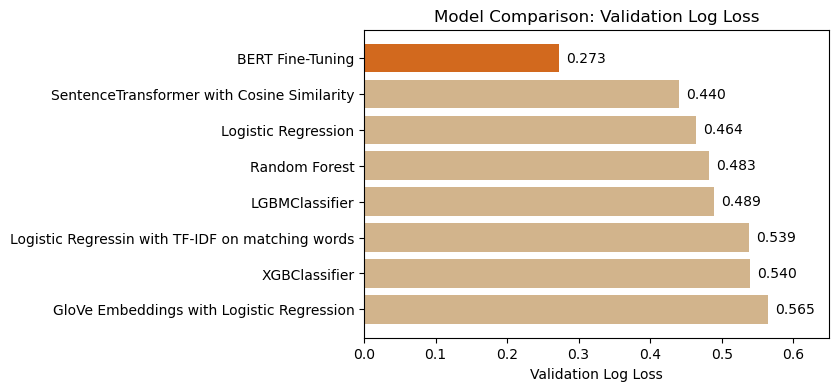

In [31]:
results_sorted = results_df.sort_values('log_loss_val', ascending=False)
min_idx = results_sorted['log_loss_val'].idxmin()

# Define bar colors
colors = ['chocolate' if i == min_idx else 'tan' for i in results_sorted.index]

plt.figure(figsize=(6, 4))
bars = plt.barh(
    results_sorted['model'],
    results_sorted['log_loss_val'],
    color=colors
)

for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 0.01,
        bar.get_y() + bar.get_height()/2,
        f"{width:.3f}",
        va='center'
    )
plt.margins(x=0.15)
plt.xlabel('Validation Log Loss')
plt.title('Model Comparison: Validation Log Loss')
plt.show()

- **BERT Fine-Tuning** achieved the **lowest validation log loss (0.273)** by a wide margin, indicating it is the most effective model at predicting the probability of duplicate questions. It is the top-performing model and is well-suited for production deployment where performance is critical.

- **SentenceTransformer with Cosine Similarity** also performed well (log loss = **0.440**), outperforming traditional methods while being significantly faster and more resource-efficient than BERT.

- **Logistic Regression with TF-IDF on matching words** achieved a log loss of **0.539**, placing it behind SentenceTransformer and simple TF-IDF on full text. This suggests that focusing only on overlapping words may discard important contextual information, which limits the model’s effectiveness.

- Tree-based models like **XGBClassifier (0.540)** and **LGBMClassifier (0.489)** were less effective, possibly due to suboptimal hyperparameters or limited ability to capture deep semantic relationships without contextual embedding. Fine-tuning their hyperparameters and incorporating richer text features could potentially improve their performance.

- Models using **static GloVe embeddings with Logistic Regression** (**0.565**) performed the worst, highlighting the limitations of fixed word vectors in this context.